In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt  
import matplotlib.animation 
#import matplotlib
#matplotlib.use('TkAgg')
import numpy as np
#Wetter-API Import
import requests 

import os
import pandas as pd
import psycopg2
#import contextily as ctx
#from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import chain


In [18]:
#read files inside folder for translational data


from typing import List
import pathlib
wd = os.getcwd()
wd = wd+"/Prepared_Data"
def find_excel_files_in(directory:pathlib.Path) -> List[pathlib.Path]:
    
    files:List[pathlib.Path] = list()
    for filepath in directory.rglob('*.csv'):
        if filepath.is_file():
            files.append(filepath)

    return files

# List of your directories
directories:List[str] = [format(wd)]

found_files:List[pathlib.Path] = list()

for directory in directories:
    directory:pathlib.Path = pathlib.Path(directory)
    found_files.extend(find_excel_files_in(directory))

#read excel files
import pandas as pd

#print(files)
    #Deleting all empty rows in the file df
for files in found_files:
    data = pd.read_csv(files)


Applying filters

In [3]:
#filter for assignee/applicants

assignee = "univ wuhan technology"


In [19]:
#Prepare a compare column for assignee filter

data["compare"] = data["optimized_assignee"]
data["compare"] = data.apply(lambda x: )

Creating 3 dataframes: All, Granted, Not-Granted 

In [5]:
#create data for proportion and add it to data df
#Creating 3 dataframes: All, Granted, Not-Granted with new column proportion_of_publication_number respectivly
from pandas import NA

percentage_column = data[data['country'].values != ""]
percentage_column = percentage_column[["publication_number","country"]].groupby('country').agg('count')*100.0/len(data)
percentage_column.rename(columns = {"publication_number" : "proportion_of_publication_number"}, inplace = True)
percentage_column.reset_index(inplace = True)
percentage_column["proportion_of_publication_number"] = percentage_column.apply(lambda x: NA if x["proportion_of_publication_number"] == 0 else x["proportion_of_publication_number"],axis = 1)
data_all = data.merge(percentage_column, left_on = 'country', right_on = 'country', how='left')
data_all

#create data for proportion and add it to data df BUT FOR GRANTED ONLY
prestep= data[data['country'].values != ""]
percentage_column = prestep[prestep["simplified_status"] == "granted"]
percentage_column = percentage_column[["publication_number","country"]].groupby('country').agg('count')*100.0/len(data)
percentage_column.rename(columns = {"publication_number" : "proportion_of_publication_number"}, inplace = True)
percentage_column.reset_index(inplace = True)
percentage_column["proportion_of_publication_number"] = percentage_column.apply(lambda x: NA if x["proportion_of_publication_number"] == 0 else x["proportion_of_publication_number"],axis = 1)
data_granted = data.merge(percentage_column, left_on = 'country', right_on = 'country', how='left')
data_granted

#create data for proportion and add it to data df BUT FOR NOT-GRANTED ONLY
prestep= data[data['country'].values != ""]
percentage_column = prestep[prestep["simplified_status"] == "not granted"]
percentage_column = percentage_column[["publication_number","country"]].groupby('country').agg('count')*100.0/len(data)
percentage_column.rename(columns = {"publication_number" : "proportion_of_publication_number"}, inplace = True)
percentage_column.reset_index(inplace = True)
percentage_column["proportion_of_publication_number"] = percentage_column.apply(lambda x: NA if x["proportion_of_publication_number"] == 0 else x["proportion_of_publication_number"],axis = 1)
data_not_granted = data.merge(percentage_column, left_on = 'country', right_on = 'country', how='left')
data_not_granted


,publication_number,title,assignee_or_applicant,priority_date_earliest,application_date,publication_date,inpadoc_family_members,optimized_assignee,inventor,abstract,...,simplified_status,patent_status_description,use,method,mixture,len_claims,len_inpadoc,test,len_test,proportion_of_publication_number
0,CN113118202A,一种高效修复砷污染土壤的固化剂及其应用 | curing agent for high ef...,"武汉理工大学,武汉市,湖北省,430070,cn | wuhan university of...",2021-04-13,2021-04-13,2021-07-16,['CN113118202A'],univ wuhan technology,"黄永炳 | 谢依廷 | 肖谣 | 汤冬梅 | 李智鹏 | 李颜政 | huang, yong...",本发明公开了一种高效修复砷污染土壤的固化剂及其应用。该固化剂包括氨水、硫酸亚铁和海泡石，其中...,...,not granted,date of publication by printing or similar pro...,0,0,9,9,1,['CN113118202A'],1,62.163896
1,CN113047326A,一种超深基坑中水平减渗帷幕形成用装置及其应用 | a device for forming ...,"同济大学,市辖区,上海市,200092,cn | tongji university,sha...",2021-04-13,2021-04-13,2021-06-29,['CN113047326A'],tongji university,王建秀 | 吴凡 | 李胡博强 | 龙燕霞 | 武昭 | 刘笑天 | 龙冠宏 | 何倩倩 |...,本发明涉及一种超深基坑中水平减渗帷幕形成用装置及其应用，该装置包括：至少一个回灌井水驱机构，...,...,not granted,date of publication by printing or similar pro...,1,0,9,10,1,['CN113047326A'],1,62.163896
2,CN113107501A,一种洞门延长钢环始发掘进施工工法 | construction method for tun...,"中铁六局集团有限公司交通工程分公司,市辖区,北京市,102300,cn | traffic ...",2021-04-13,2021-04-13,2021-07-13,['CN113107501A'],china railway eryuan eng group co ltd,"陈训明 | 闫波 | 杨福义 | 魏明路 | chen, xun-ming | yan, b...",本发明公开了一种洞门延长钢环始发掘进施工工法，包括如下步骤：1)盾构始发端头加固；2)密集建...,...,not granted,date of publication by printing or similar pro...,1,6,0,7,1,['CN113107501A'],1,62.163896
3,CN113135806A,一种重金属污染的微生物复合肥及其制备方法 | microorganism compound ...,"遵义市农村发展服务中心,遵义市,贵州省,563000,cn | zunyi rural de...",2021-04-14,2021-04-14,2021-07-20,['CN113135806A'],zunyi rural development service center,邵代兴 | 罗元琼 | 令狐丹丹 | 吴正肖 | 但成丽 | 张晓敏 | 郑明强 | 苟世新...,本发明公开了一种重金属污染的微生物复合肥及其制备方法，包括如下组分：腐殖酸8‑25％、炭化百...,...,not granted,date of publication by printing or similar pro...,0,1,7,8,1,['CN113135806A'],1,62.163896
4,CN113026666A,外隔内排式弱膨胀土表层边坡治理装置及其施工方法 | external side slope ...,"长江勘测规划设计研究有限责任公司,武汉市,湖北省,430010,cn | changjian...",2021-04-15,2021-04-15,2021-06-25,['CN113026666A'],changjiang inst survey planning design &,王汉辉 | 邹德兵 | 颜天佑 | 闫福根 | 王磊 | 张国强 | 李子康 | 冷星火 |...,本发明公开了一种外隔内排式弱膨胀土表层边坡治理装置，涉及水利、公路、桥梁等工程边坡治理领域。...,...,not granted,date of publication by printing or similar pro...,1,0,5,6,1,['CN113026666A'],1,62.163896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18702,CN105908676A,一种堤坝水下混凝土护面施工方法 | the construction method of c...,"广东水利电力职业技术学院,广州市,广东省,510635,cn | 广东省水利水电科学研究院",2016-04-25,2016-04-25,2016-08-31,"['CN105908676A', 'CN105908676B']",guangdong res inst water resources & hyd | gua...,黄亚梅 | 王立华 | 黄锦林,the invention claims a construction method of ...,...,not granted,date of publication by printing or similar pro...,1,9,0,10,2,"['CN105908676B', 'CN105908676A']",2,62.163896
18703,FR3050460A1,procede d'obtention d'une substance minerale c...,"soletanche freyssinet,rueil malmaison,fr,56213...",2016-04-25,2016-04-25,2017-10-27,"['FR3050460A1', 'CA2965072A1', 'CN107384971A',...",soletanche freyssinet sa,"sarraf, riad",l'invention concerne un procédé d'obtention d'...,...,not granted,date of publication by printing or similar pro...,3,7,5,15,9,"['EP3239299A1', 'RU2017114017A', 'EP3239299B1'...",9,0.497140
18704,IN201737019074A,fluid mixture composition using carbon dioxide...,daewoo e&c co. ltd.,2016-04-25,2017-05-31,2017-12-01,['IN201737019074A'],doosan holding,"kim, byung hwan | shin, hyun young | kim, woon...",the present invention relates to a fluid mixtu...,...,not granted,date of publication by printing or similar pro...,1,0,8,9,1,['IN201737019074A'],1,2.314642
18705,IN201714014616A,method for obtaining cement mineral substances,soletanche freyssinet,2016-04-25,2017-04-25,2017-12-29,['IN201714014616A'],soletanche freyssinet sa,"sarraf, riad",the invention relates to a method for obtainin...,...,not granted,date of publication by printing or similar pro...,3,7,5,15,1,['IN201714014616A'],1,2.314642


In [6]:
#make countrynames lowercase
data["country"] = data["country"].str.lower()

In [7]:
#create data for total and add it to data df
#Creating 3 dataframes: All, Granted, Not-Granted with new column total_of_publication_number respectivly
from pandas import NA

total_column = data[data['country'].values != ""]
total_column = total_column[["publication_number","country"]].groupby('country').agg('count')
total_column.rename(columns = {"publication_number" : "total_of_publication_number"}, inplace = True)
total_column.reset_index(inplace = True)
total_column["total_of_publication_number"] = total_column.apply(lambda x: NA if x["total_of_publication_number"] == 0 else x["total_of_publication_number"],axis = 1)
data_all_total = data.merge(total_column, left_on = 'country', right_on = 'country', how='left')
data_all_total

#create data for proportion and add it to data df BUT FOR GRANTED ONLY
prestep= data[data['country'].values != ""]
total_column = prestep[prestep["simplified_status"] == "granted"]
total_column = total_column[["publication_number","country"]].groupby('country').agg('count')
total_column.rename(columns = {"publication_number" : "total_of_publication_number"}, inplace = True)
total_column.reset_index(inplace = True)
total_column["total_of_publication_number"] = total_column.apply(lambda x: NA if x["total_of_publication_number"] == 0 else x["total_of_publication_number"],axis = 1)
data_granted_total = data.merge(total_column, left_on = 'country', right_on = 'country', how='left')
data_granted_total

#create data for proportion and add it to data df BUT FOR NOT-GRANTED ONLY
prestep= data[data['country'].values != ""]
total_column = prestep[prestep["simplified_status"] == "not granted"]
total_column = total_column[["publication_number","country"]].groupby('country').agg('count')
total_column.rename(columns = {"publication_number" : "total_of_publication_number"}, inplace = True)
total_column.reset_index(inplace = True)
total_column["total_of_publication_number"] = total_column.apply(lambda x: NA if x["total_of_publication_number"] == 0 else x["total_of_publication_number"],axis = 1)
data_not_granted_total = data.merge(total_column, left_on = 'country', right_on = 'country', how='left')
data_not_granted_total

,publication_number,title,assignee_or_applicant,priority_date_earliest,application_date,publication_date,inpadoc_family_members,optimized_assignee,inventor,abstract,...,simplified_status,patent_status_description,use,method,mixture,len_claims,len_inpadoc,test,len_test,total_of_publication_number
0,CN113118202A,一种高效修复砷污染土壤的固化剂及其应用 | curing agent for high ef...,"武汉理工大学,武汉市,湖北省,430070,cn | wuhan university of...",2021-04-13,2021-04-13,2021-07-16,['CN113118202A'],univ wuhan technology,"黄永炳 | 谢依廷 | 肖谣 | 汤冬梅 | 李智鹏 | 李颜政 | huang, yong...",本发明公开了一种高效修复砷污染土壤的固化剂及其应用。该固化剂包括氨水、硫酸亚铁和海泡石，其中...,...,not granted,date of publication by printing or similar pro...,0,0,9,9,1,['CN113118202A'],1,11629.0
1,CN113047326A,一种超深基坑中水平减渗帷幕形成用装置及其应用 | a device for forming ...,"同济大学,市辖区,上海市,200092,cn | tongji university,sha...",2021-04-13,2021-04-13,2021-06-29,['CN113047326A'],tongji university,王建秀 | 吴凡 | 李胡博强 | 龙燕霞 | 武昭 | 刘笑天 | 龙冠宏 | 何倩倩 |...,本发明涉及一种超深基坑中水平减渗帷幕形成用装置及其应用，该装置包括：至少一个回灌井水驱机构，...,...,not granted,date of publication by printing or similar pro...,1,0,9,10,1,['CN113047326A'],1,11629.0
2,CN113107501A,一种洞门延长钢环始发掘进施工工法 | construction method for tun...,"中铁六局集团有限公司交通工程分公司,市辖区,北京市,102300,cn | traffic ...",2021-04-13,2021-04-13,2021-07-13,['CN113107501A'],china railway eryuan eng group co ltd,"陈训明 | 闫波 | 杨福义 | 魏明路 | chen, xun-ming | yan, b...",本发明公开了一种洞门延长钢环始发掘进施工工法，包括如下步骤：1)盾构始发端头加固；2)密集建...,...,not granted,date of publication by printing or similar pro...,1,6,0,7,1,['CN113107501A'],1,11629.0
3,CN113135806A,一种重金属污染的微生物复合肥及其制备方法 | microorganism compound ...,"遵义市农村发展服务中心,遵义市,贵州省,563000,cn | zunyi rural de...",2021-04-14,2021-04-14,2021-07-20,['CN113135806A'],zunyi rural development service center,邵代兴 | 罗元琼 | 令狐丹丹 | 吴正肖 | 但成丽 | 张晓敏 | 郑明强 | 苟世新...,本发明公开了一种重金属污染的微生物复合肥及其制备方法，包括如下组分：腐殖酸8‑25％、炭化百...,...,not granted,date of publication by printing or similar pro...,0,1,7,8,1,['CN113135806A'],1,11629.0
4,CN113026666A,外隔内排式弱膨胀土表层边坡治理装置及其施工方法 | external side slope ...,"长江勘测规划设计研究有限责任公司,武汉市,湖北省,430010,cn | changjian...",2021-04-15,2021-04-15,2021-06-25,['CN113026666A'],changjiang inst survey planning design &,王汉辉 | 邹德兵 | 颜天佑 | 闫福根 | 王磊 | 张国强 | 李子康 | 冷星火 |...,本发明公开了一种外隔内排式弱膨胀土表层边坡治理装置，涉及水利、公路、桥梁等工程边坡治理领域。...,...,not granted,date of publication by printing or similar pro...,1,0,5,6,1,['CN113026666A'],1,11629.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18702,CN105908676A,一种堤坝水下混凝土护面施工方法 | the construction method of c...,"广东水利电力职业技术学院,广州市,广东省,510635,cn | 广东省水利水电科学研究院",2016-04-25,2016-04-25,2016-08-31,"['CN105908676A', 'CN105908676B']",guangdong res inst water resources & hyd | gua...,黄亚梅 | 王立华 | 黄锦林,the invention claims a construction method of ...,...,not granted,date of publication by printing or similar pro...,1,9,0,10,2,"['CN105908676B', 'CN105908676A']",2,11629.0
18703,FR3050460A1,procede d'obtention d'une substance minerale c...,"soletanche freyssinet,rueil malmaison,fr,56213...",2016-04-25,2016-04-25,2017-10-27,"['FR3050460A1', 'CA2965072A1', 'CN107384971A',...",soletanche freyssinet sa,"sarraf, riad",l'invention concerne un procédé d'obtention d'...,...,not granted,date of publication by printing or similar pro...,3,7,5,15,9,"['EP3239299A1', 'RU2017114017A', 'EP3239299B1'...",9,93.0
18704,IN201737019074A,fluid mixture composition using carbon dioxide...,daewoo e&c co. ltd.,2016-04-25,2017-05-31,2017-12-01,['IN201737019074A'],doosan holding,"kim, byung hwan | shin, hyun young | kim, woon...",the present invention relates to a fluid mixtu...,...,not granted,date of publication by printing or similar pro...,1,0,8,9,1,['IN201737019074A'],1,433.0
18705,IN201714014616A,method for obtaining cement mineral substances,soletanche freyssinet,2016-04-25,2017-04-25,2017-12-29,['IN201714014616A'],soletanche freyssinet sa,"sarraf, riad",the invention relates to a method for obtainin...,...,not granted,date of publication by printing or similar pro...,3,7,5,15,1,['IN201714014616A'],1,433.0


In [8]:
total_column

,country,total_of_publication_number
0,australia,182
1,austria,1
2,belgium,3
3,brazil,104
4,canada,105
5,chile,1
6,china,11629
7,colombia,1
8,croatia,1
9,czech republic,6


In [9]:
#get current working directory

current_wd = os.getcwd()
path_worldmap= "/Worldmap/World_Countries.shp"
path_worldmap = current_wd+path_worldmap
path_worldmap

'/Users/ademzemni/neuefische/capstone/Capstone_Project/Worldmap/World_Countries.shp'

In [10]:
#read worldmap shape file
world_map = gpd.read_file(path_worldmap)

In [11]:
#make country names lowercase in order to match dataframes by countrynames
world_map["COUNTRY"]=world_map["COUNTRY"].str.lower()
world_map.sort_values(by = "COUNTRY")

,COUNTRY,geometry
2,afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
5,albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472..."
3,algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
9,american samoa (us),"POLYGON ((-170.74390 -14.37556, -170.74942 -14..."
237,american virgin islands (us),"POLYGON ((-64.89612 17.67667, -64.89140 17.683..."
...,...,...
240,western sahara,"POLYGON ((-14.30347 21.34167, -14.46722 21.340..."
242,western samoa,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
244,yemen,"MULTIPOLYGON (((48.68639 14.03750, 48.61000 14..."
245,zambia,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."


In [12]:
#adjust important names for merging
world_map["COUNTRY"] = world_map["COUNTRY"].str.replace("united states", "united states of america")
world_map["COUNTRY"] = world_map["COUNTRY"].str.replace("south korea", "korea (south)")
world_map["COUNTRY"] = world_map["COUNTRY"].str.replace("moldova", "republic of moldova")
world_map["COUNTRY"] = world_map["COUNTRY"].str.replace("russia", "russian federation")
#data["country"] = data["country"].str.replace("hong kong (s.a.r.)", "china")
#world_map["COUNTRY"] = world_map["COUNTRY"].str.replace(f"hong kong (s.a.r)", "china")

In [13]:
#merge dataframes
merged_all = world_map.merge(data_all_total, left_on = 'COUNTRY', right_on = 'country', how='outer')
merged_all['total_of_publication_number'] = merged_all['total_of_publication_number'].fillna(0)

#merge granted
merged_granted = world_map.merge(data_granted_total, left_on = 'COUNTRY', right_on = 'country', how='outer')
merged_granted['total_of_publication_number'] = merged_granted['total_of_publication_number'].fillna(0)

merged_not_granted = world_map.merge(data_not_granted_total, left_on = 'COUNTRY', right_on = 'country', how='outer')
merged_not_granted['total_of_publication_number'] = merged_not_granted['total_of_publication_number'].fillna(0)

In [14]:
#create list of countries that are not on the world map

countries_not_on_map = []
for element in list(total_column["country"]):
    if element not in list(world_map["COUNTRY"]):
        countries_not_on_map.append(element)
 
print(countries_not_on_map)

['european patent office', 'hong kong (s.a.r.)', 'world intellectual property organization (wipo)']


In [15]:
#extract proportions for if "country" is no actual country
nocountries = total_column["country"].isin(countries_not_on_map)
nocountries = total_column[nocountries]
nocountries

,country,total_of_publication_number
10,european patent office,357
14,hong kong (s.a.r.),15
40,world intellectual property organization (wipo),639


In [16]:
merged_all[merged_all["COUNTRY"]=="china"]

,COUNTRY,geometry,publication_number,title,assignee_or_applicant,priority_date_earliest,application_date,publication_date,inpadoc_family_members,optimized_assignee,...,simplified_status,patent_status_description,use,method,mixture,len_claims,len_inpadoc,test,len_test,total_of_publication_number
620,china,"MULTIPOLYGON (((110.71583 20.06889, 110.77859 ...",CN113118202A,一种高效修复砷污染土壤的固化剂及其应用 | curing agent for high ef...,"武汉理工大学,武汉市,湖北省,430070,cn | wuhan university of...",2021-04-13,2021-04-13,2021-07-16,['CN113118202A'],univ wuhan technology,...,not granted,date of publication by printing or similar pro...,0.0,0.0,9.0,9.0,1.0,['CN113118202A'],1.0,11920.0
621,china,"MULTIPOLYGON (((110.71583 20.06889, 110.77859 ...",CN113047326A,一种超深基坑中水平减渗帷幕形成用装置及其应用 | a device for forming ...,"同济大学,市辖区,上海市,200092,cn | tongji university,sha...",2021-04-13,2021-04-13,2021-06-29,['CN113047326A'],tongji university,...,not granted,date of publication by printing or similar pro...,1.0,0.0,9.0,10.0,1.0,['CN113047326A'],1.0,11920.0
622,china,"MULTIPOLYGON (((110.71583 20.06889, 110.77859 ...",CN113107501A,一种洞门延长钢环始发掘进施工工法 | construction method for tun...,"中铁六局集团有限公司交通工程分公司,市辖区,北京市,102300,cn | traffic ...",2021-04-13,2021-04-13,2021-07-13,['CN113107501A'],china railway eryuan eng group co ltd,...,not granted,date of publication by printing or similar pro...,1.0,6.0,0.0,7.0,1.0,['CN113107501A'],1.0,11920.0
623,china,"MULTIPOLYGON (((110.71583 20.06889, 110.77859 ...",CN113135806A,一种重金属污染的微生物复合肥及其制备方法 | microorganism compound ...,"遵义市农村发展服务中心,遵义市,贵州省,563000,cn | zunyi rural de...",2021-04-14,2021-04-14,2021-07-20,['CN113135806A'],zunyi rural development service center,...,not granted,date of publication by printing or similar pro...,0.0,1.0,7.0,8.0,1.0,['CN113135806A'],1.0,11920.0
624,china,"MULTIPOLYGON (((110.71583 20.06889, 110.77859 ...",CN113026666A,外隔内排式弱膨胀土表层边坡治理装置及其施工方法 | external side slope ...,"长江勘测规划设计研究有限责任公司,武汉市,湖北省,430010,cn | changjian...",2021-04-15,2021-04-15,2021-06-25,['CN113026666A'],changjiang inst survey planning design &,...,not granted,date of publication by printing or similar pro...,1.0,0.0,5.0,6.0,1.0,['CN113026666A'],1.0,11920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12535,china,"MULTIPOLYGON (((110.71583 20.06889, 110.77859 ...",CN105917779A,在边坡上种植芦苇的方法 | it plants reed on the slope method,"中国科学院武汉植物园,武汉市,湖北省,430074,cn",2016-04-22,2016-04-22,2016-09-07,"['CN105917779A', 'CN105917779B']",chinese acad sci wuhan botanical garden,...,not granted,date of publication by printing or similar pro...,0.0,6.0,0.0,6.0,2.0,"['CN105917779B', 'CN105917779A']",2.0,11920.0
12536,china,"MULTIPOLYGON (((110.71583 20.06889, 110.77859 ...",CN105917896A,在边坡上种植鸢尾的方法 | planting method of iris tail on ...,"中国科学院武汉植物园,武汉市,湖北省,430074,cn",2016-04-22,2016-04-22,2016-09-07,"['CN105917896A', 'CN105917896B']",chinese acad sci wuhan botanical garden,...,not granted,date of publication by printing or similar pro...,0.0,6.0,0.0,6.0,2.0,"['CN105917896B', 'CN105917896A']",2.0,11920.0
12537,china,"MULTIPOLYGON (((110.71583 20.06889, 110.77859 ...",CN106753395A,一种高效土壤稳定剂及其应用 | a high efficient soil stabiliz...,"佛山瑞箭体育器材有限公司,佛山市,广东省,528137,cn",2016-04-22,2016-04-22,2017-05-31,['CN106753395A'],foshan ruijian sports equip co ltd,...,not granted,date of publication by printing or similar pro...,0.0,1.0,8.0,9.0,1.0,['CN106753395A'],1.0,11920.0
12538,china,"MULTIPOLYGON (((110.71583 20.06889, 110.77859 ...",CN205712142U,一种毯子 | a blanket,"王子鸣,昌吉回族自治州,新疆维吾尔自治区,831700,cn | 耿子函 | 张思奇 | 戴闻语",2016-04-22,2016-04-22,2016-11-23,['CN205712142U'],gree electric appliances inc of zhuhai,...,not granted,date of publication by printing or similar pro...,0.0,0.0,10.0,10.0,1.0,['CN205712142U'],1.0,11920.0


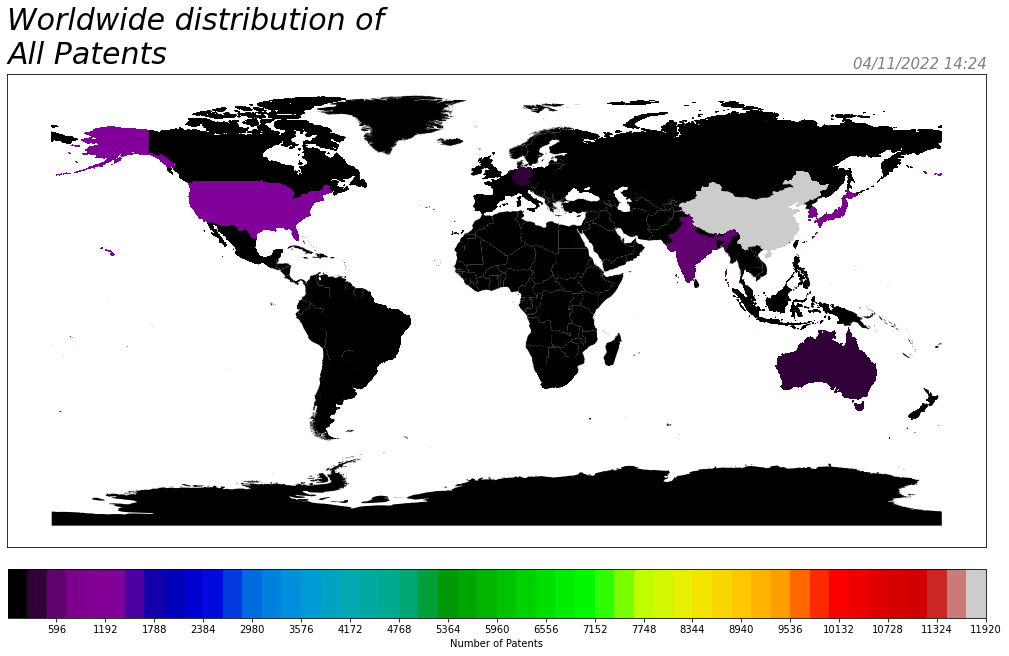

In [17]:
#plot worldmap ALL

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import TwoSlopeNorm
import statistics

#statistics.median(percentage_column["proportion_of_publication_number"])


fig, ax = plt.subplots(figsize = (20,10))

#divider = make_axes_locatable(ax)

#cax = divider.append_axes("right", size="5%", pad=0.1)

# create a normalized colorbar
norm = TwoSlopeNorm(vmin=min(total_column["total_of_publication_number"]),
                    vcenter=statistics.median(total_column["total_of_publication_number"]),
                    vmax=max(total_column["total_of_publication_number"]))
cmap=plt.cm.get_cmap('nipy_spectral', 50)
#cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

#creating values for tick in legend; 20 ticks
ticks = []
for x in range(1,21):
    ticks.append(round(x/20*max(merged_all["total_of_publication_number"]),1))

tick_label = []
for x in range(1,21):
    tick_label.append(f"{round(x/20*max(merged_all['total_of_publication_number']),1)}%")

#not in use yet
legend_label = []
for x in range(1,21):
    legend_label.append(f"{round(x/20*max(merged_all['total_of_publication_number']),1)}%")
legend_label

fig = merged_all.plot(ax = ax,markersize = 100,column = 'total_of_publication_number', figsize=(20,10),
                                                     cmap=cmap,
                                                     # create a normalized colorbar
                                                     #cbar = plt.cm.ScalarMappable(norm=norm),  
                                                     legend = True,
                                                    
                                                     legend_kwds={'label': 'Number of Patents',
                                                                    #'title_fontsize':20,
                                                                    'orientation': "horizontal",
                                                                    'pad': 0.04,
                                                                    'fraction': 0.09,
                                                                   # 'norm': norm,
                                                                    'ticks':ticks
                                                                    #"fmt":"{:%}"
                                                                    
                                                                    },
                                                     missing_kwds={
                                                                 "color":"grey",
                                                                 "edgecolor":"black",
                                                                 "hatch":"---",
                                                                 "label":"Missing Values"
                                                                },
                                                     vmin=0, vmax=max(merged_all["total_of_publication_number"])
                                                     )


#include no countries in the title
#creation of string
#preparation for no country entries
nocountries_string =f"{str(nocountries.iloc[0][0])}: {str(round(nocountries.iloc[0][1],2))}% \n "
nocountries_string
for i in range(len(nocountries)):
    if i == 0:
        continue
    nocountries_string = nocountries_string + f"{str(nocountries.iloc[i][0])}: {str(round(nocountries.iloc[i][1],2))}% \n "

#ax_cbar = fig.colorbar(cbar, ax=ax)
#plt.legend(title = "lol",loc = "lower center")
plt.title(f"Worldwide distribution of\nAll Patents", fontsize = 30, loc = "left",y = 1.01,style = 'italic')
from datetime import datetime
now = datetime.now()
plt.title(f"{now.strftime('%d/%m/%Y %H:%M')}", loc='right', fontsize=15, color='grey', style='italic')
plt.tick_params(left = False, bottom = False)
#ax.axes.set_xticklabels(tick_label)


ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.show()